# Alunos de uma escola

## Criando os nomes

In [2]:
import pandas as pd

In [7]:
nomesF = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomesF

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [8]:
nomesM = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomesM

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [10]:
nomesF.sample(5)

,nome,regiao,freq,rank,sexo
146,SAMARA,0,110087,147,F
124,LAIS,0,130730,125,F
10,SANDRA,0,479230,11,F
170,MARINALVA,0,93355,171,F
112,TATIANA,0,142512,113,F


In [11]:
nomesM.sample(5)

,nome,regiao,freq,rank,sexo
134,ALBERTO,0,108018,135,M
79,VALDIR,0,187067,80,M
174,DENIS,0,75029,175,M
166,MICHEL,0,78252,167,M
30,ANDERSON,0,470777,31,M


In [12]:
print('Quantidade de nomes: ' + str(len(nomesF) + len(nomesM)))

Quantidade de nomes: 400


In [13]:
frames = [nomesF, nomesM]

In [14]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [15]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
188,VALDECIR
149,CICERA
114,ARTHUR
154,NICOLE
181,YURI


## Incluindo ID dos alunos

In [17]:
import numpy as np

In [18]:
np.random.seed(123)

In [19]:
totalAlunos = len(nomes)
totalAlunos

400

In [20]:
nomes['idAluno'] = np.random.permutation(totalAlunos) + 1

In [25]:
nomes.sample(5)

,nome,idAluno
92,DIOGO,61
166,KELLY,109
98,THAIS,148
142,HUGO,378
184,MARILIA,282


In [26]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, totalAlunos)

In [27]:
nomes

,nome,idAluno,dominio
0,MARIA,235,@servicodoemail.com
1,ANA,43,@dominiodoemail.com.br
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@dominiodoemail.com.br
...,...,...,...
195,WALTER,231,@servicodoemail.com
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@servicodoemail.com
198,ALVARO,383,@dominiodoemail.com.br


In [28]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [29]:
nomes

,nome,idAluno,dominio,email
0,MARIA,235,@servicodoemail.com,maria@servicodoemail.com
1,ANA,43,@dominiodoemail.com.br,ana@dominiodoemail.com.br
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@dominiodoemail.com.br,adriana@dominiodoemail.com.br
...,...,...,...,...
195,WALTER,231,@servicodoemail.com,walter@servicodoemail.com
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@servicodoemail.com,michael@servicodoemail.com
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br


## Criando tabela de cursos

In [33]:
!pip3 install html5lib

In [34]:
!pip3 install lxml

In [36]:
import html5lib

In [39]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [40]:
type(cursos)

list

In [41]:
cursos = cursos[0]

In [42]:
type(cursos)

pandas.core.frame.DataFrame

In [44]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


### Alterando o índice dos cursos

In [46]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [47]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [48]:
cursos['id'] = cursos.index + 1

In [49]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [50]:
cursos = cursos.set_index('id')

In [51]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando os alunos nos cursos

In [52]:
nomes.sample(5)

,nome,idAluno,dominio,email
63,MIGUEL,239,@dominiodoemail.com.br,miguel@dominiodoemail.com.br
185,SHEILA,116,@dominiodoemail.com.br,sheila@dominiodoemail.com.br
144,LORENA,91,@servicodoemail.com,lorena@servicodoemail.com
120,EDILSON,57,@servicodoemail.com,edilson@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


In [58]:
'''lógica de matrícula: uma quantidate muito baixa de alunos se matricula em muitos cursos
e uma quantidade muito alta de alunos se matricula em poucos cursos'''
nomes['matriculas'] = np.ceil(np.random.exponential(size=totalAlunos) * 1.5).astype(int)

In [59]:
nomes.sample(5)

,nome,idAluno,dominio,email,matriculas
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
17,FELIPE,113,@dominiodoemail.com.br,felipe@dominiodoemail.com.br,5
128,EDVALDO,313,@servicodoemail.com,edvaldo@servicodoemail.com,3
137,NAIR,129,@dominiodoemail.com.br,nair@dominiodoemail.com.br,1
24,CLAUDIA,16,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,4


In [60]:
nomes.matriculas.describe()

count    400.000000
mean       2.032500
std        1.389702
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: matriculas, dtype: float64

In [61]:
import seaborn as sns

C:\Users\rafa_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

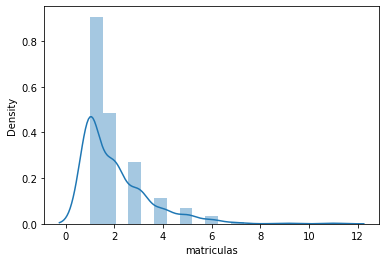

In [62]:
sns.distplot(nomes.matriculas)

In [63]:
nomes.matriculas.value_counts()

1     191
2     102
3      57
4      24
5      15
6       7
7       2
9       1
11      1
Name: matriculas, dtype: int64

In [64]:
nomes.sample(5)

,nome,idAluno,dominio,email,matriculas
115,MILTON,104,@servicodoemail.com,milton@servicodoemail.com,3
185,JONATAN,127,@dominiodoemail.com.br,jonatan@dominiodoemail.com.br,1
67,PAULA,212,@servicodoemail.com,paula@servicodoemail.com,2
35,CARLA,262,@servicodoemail.com,carla@servicodoemail.com,3
70,ISABELA,73,@dominiodoemail.com.br,isabela@dominiodoemail.com.br,3


## Vinculando cursos aos alunos de forma alatória

In [75]:
tadasMatriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [76]:
for index, row in nomes.iterrows():
    id = row.idAluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        tadasMatriculas.append(mat)

matriculas = pd.DataFrame(tadasMatriculas,
                          columns=['idAluno', 'idCurso'])

In [77]:
matriculas.head()

,idAluno,idCurso
0,235,7
1,235,9
2,43,14
3,43,11
4,43,8


In [80]:
matriculas.groupby('idCurso').count().join(cursos['nome_do_curso']).rename(columns={'idAluno' : 'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
idCurso,,
1,48,Lógica de programação
2,13,Java para Web
3,23,C# para Web
4,18,Ruby on Rails
5,8,Cursos de Python
6,44,PHP com MySql
7,36,.NET para web
8,38,Novas integrações com Java
9,59,TDD com Java


In [82]:
nomes.sample(3)

,nome,idAluno,dominio,email,matriculas
128,JOICE,357,@dominiodoemail.com.br,joice@dominiodoemail.com.br,2
22,ANDRE,311,@servicodoemail.com,andre@servicodoemail.com,2
80,EMERSON,373,@dominiodoemail.com.br,emerson@dominiodoemail.com.br,6


In [83]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [84]:
matriculas.head()

,idAluno,idCurso
0,235,7
1,235,9
2,43,14
3,43,11
4,43,8


In [85]:
matriculasCurso = matriculas.groupby('idCurso').count().join(cursos['nome_do_curso']).rename(columns={'idAluno' : 'quantidade_alunos'})

In [87]:
matriculasCurso.head()

,quantidade_alunos,nome_do_curso
idCurso,,
1,48,Lógica de programação
2,13,Java para Web
3,23,C# para Web
4,18,Ruby on Rails
5,8,Cursos de Python


## Exportando DataFrame para outros formatos

In [88]:
matriculasCurso.to_csv('matriculas_por_cursos.csv', index=False)

In [90]:
matriculas_json = matriculasCurso.to_json()

In [91]:
matriculas_json

'{"quantidade_alunos":{"1":48,"2":13,"3":23,"4":18,"5":8,"6":44,"7":36,"8":38,"9":59,"10":44,"11":45,"12":75,"13":25,"14":40,"15":66,"16":7,"17":83,"18":81,"19":31,"20":29},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [92]:
matriculas_html = matriculasCurso.to_html()

In [95]:
# o resultado do print é copiado e colado em um editor de texto e salvo com formato .html
print(matriculas_html[])

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>idCurso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>48</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>13</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>23</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>18</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>8</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>44</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>36</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>38</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
     

## Exportando para um banco SQL

In [96]:
!pip install sqlalchemy

In [97]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [98]:
engine = create_engine('sqlite:///:memory:')

In [99]:
engine

Engine(sqlite:///:memory:)

In [100]:
type(engine)

sqlalchemy.engine.base.Engine

In [102]:
matriculasCurso.to_sql('matriculas', engine)

In [103]:
print(engine.table_names())

['matriculas']


C:\Users\rafa_\AppData\Local\Temp/ipykernel_1568/1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [104]:
#para remover os avisos de que o método será descotinuado
inspector = inspect(engine)  #cria um Inspector object

In [105]:
print(inspector.get_table_names())

['matriculas']


In [106]:
inspector

## Busca no banco SQL

In [108]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [111]:
pd.read_sql(query, engine)

,idCurso,quantidade_alunos,nome_do_curso
0,2,13,Java para Web
1,4,18,Ruby on Rails
2,5,8,Cursos de Python
3,16,7,Estatística básica


In [112]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

,nome_do_curso,quantidade_alunos
0,Lógica de programação,48
1,Java para Web,13
2,C# para Web,23
3,Ruby on Rails,18
4,Cursos de Python,8
5,PHP com MySql,44
6,.NET para web,36
7,Novas integrações com Java,38
8,TDD com Java,59
9,Código limpo com C#,44


In [113]:
muitasMatriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

In [114]:
muitasMatriculas

,nome_do_curso,quantidade_alunos
0,Lógica de programação,48
1,Java para Web,13
2,C# para Web,23
3,Ruby on Rails,18
4,Cursos de Python,8
5,PHP com MySql,44
6,.NET para web,36
7,Novas integrações com Java,38
8,TDD com Java,59
9,Código limpo com C#,44


In [116]:
muitasMatriculas.query('quantidade_alunos > 60')

,nome_do_curso,quantidade_alunos
11,Hardware básico,75
14,Análise de dados,66
16,Internet das coisas,83
17,Programação funcional,81


In [119]:
muitasMatriculas = muitasMatriculas.query('quantidade_alunos > 80')

In [120]:
muitasMatriculas

,nome_do_curso,quantidade_alunos
16,Internet das coisas,83
17,Programação funcional,81


## Escrevendo no banco SQL

In [121]:
muitasMatriculas.to_sql('muitas_matriculas', con=engine)

In [122]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\rafa_\AppData\Local\Temp/ipykernel_1568/1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## Buscando nomes dos alunos por curso

In [125]:
matriculasCurso

,quantidade_alunos,nome_do_curso
idCurso,,
1,48,Lógica de programação
2,13,Java para Web
3,23,C# para Web
4,18,Ruby on Rails
5,8,Cursos de Python
6,44,PHP com MySql
7,36,.NET para web
8,38,Novas integrações com Java
9,59,TDD com Java


In [126]:
matriculas

,idAluno,idCurso
0,235,7
1,235,9
2,43,14
3,43,11
4,43,8
...,...,...
808,383,8
809,383,12
810,383,15
811,366,18


In [128]:
id_curso = 4
proxima_turma = matriculas.query('idCurso == {}'.format(id_curso))
proxima_turma

,idAluno,idCurso
26,163,4
45,16,4
48,12,4
57,284,4
84,358,4
99,25,4
113,396,4
148,329,4
220,380,4
254,197,4


In [129]:
nomes.sample(5)

,nome,idAluno,dominio,email,matriculas
104,EVA,13,@servicodoemail.com,eva@servicodoemail.com,1
152,LARA,160,@dominiodoemail.com.br,lara@dominiodoemail.com.br,1
67,HENRIQUE,64,@dominiodoemail.com.br,henrique@dominiodoemail.com.br,1
151,JOSUE,393,@servicodoemail.com,josue@servicodoemail.com,3
58,ALESSANDRA,193,@dominiodoemail.com.br,alessandra@dominiodoemail.com.br,2


In [131]:
proxima_turma.set_index('idAluno').join(nomes.set_index('idAluno'))

,idCurso,nome,dominio,email,matriculas
idAluno,,,,,
163,4,LUCIANA,@servicodoemail.com,luciana@servicodoemail.com,4
16,4,CLAUDIA,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,4
12,4,RITA,@servicodoemail.com,rita@servicodoemail.com,1
284,4,SIMONE,@dominiodoemail.com.br,simone@dominiodoemail.com.br,5
358,4,FABIANA,@dominiodoemail.com.br,fabiana@dominiodoemail.com.br,2
25,4,DANIELE,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,1
396,4,VIVIANE,@servicodoemail.com,viviane@servicodoemail.com,1
329,4,MONICA,@servicodoemail.com,monica@servicodoemail.com,4
380,4,ELZA,@servicodoemail.com,elza@servicodoemail.com,3


In [132]:
proxima_turma.set_index('idAluno').join(nomes.set_index('idAluno'))['nome']

idAluno
163      LUCIANA
16       CLAUDIA
12          RITA
284       SIMONE
358      FABIANA
25       DANIELE
396      VIVIANE
329       MONICA
380         ELZA
197    ELIZABETE
397       LILIAN
227       ROSANE
363       SILVIO
141        PABLO
4         MOISES
351      EMANUEL
385       MICHEL
254    CLAUDINEI
Name: nome, dtype: object

In [133]:
proxima_turma.set_index('idAluno').join(nomes.set_index('idAluno'))['nome'].to_frame()

,nome
idAluno,
163,LUCIANA
16,CLAUDIA
12,RITA
284,SIMONE
358,FABIANA
25,DANIELE
396,VIVIANE
329,MONICA
380,ELZA


In [151]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Ruby on Rails
Name: 4, dtype: object

In [152]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Ruby on Rails'

In [153]:
proxima_turma = proxima_turma.set_index('idAluno').join(nomes.set_index('idAluno'))['nome'].to_frame()

In [154]:
proxima_turma

,nome
idAluno,
163,LUCIANA
16,CLAUDIA
12,RITA
284,SIMONE
358,FABIANA
25,DANIELE
396,VIVIANE
329,MONICA
380,ELZA


In [156]:
proxima_turma = proxima_turma.rename(columns={'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [157]:
proxima_turma.sample(5)

,Alunos do curso de Ruby on Rails
idAluno,
16,CLAUDIA
4,MOISES
396,VIVIANE
12,RITA
25,DANIELE


## Exportando para Excel

In [158]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [159]:
#lendo arquivo excel
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Ruby on Rails
0,LUCIANA
1,CLAUDIA
2,RITA
3,SIMONE
4,FABIANA
5,DANIELE
6,VIVIANE
7,MONICA
8,ELZA
9,ELIZABETE
